In [1]:
'''
ECE276A WI21 PR1: Color Classification and Recycling Bin Detection
'''
import os
import numpy as np
import cv2
from skimage.measure import label, regionprops
from pixel_classifier import PixelClassifier
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
from generate_rgb_data import read_pixels

In [2]:
class BinDetector():
    def __init__(self):
        '''
            Initilize your stop sign detector with the attributes you need,
            e.g., parameters of your classifier
        '''
        pass

    def segment_image(self, img):
        '''
            Obtain a segmented image using a color classifier,
            e.g., Logistic Regression, Single Gaussian Generative Model, Gaussian Mixture, 
            call other functions in this class if needed

            Inputs:
                img - original image
            Outputs:
                mask_img - a binary image with 1 if the pixel in the original image is red and 0 otherwise
        '''
        # YOUR CODE HERE
        # from pixel classifier
        clf = PixelClassifier()
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        y = clf(img)
        plt.show(y)
        
        mask_img = img
        return mask_img

    def get_bounding_boxes(self, img):
        '''
            Find the bounding boxes of the recycling bins
            call other functions in this class if needed

            Inputs:
                img - original image
            Outputs:
                boxes - a list of lists of bounding boxes. Each nested list is a bounding box in the form of [x1, y1, x2, y2] 
                where (x1, y1) and (x2, y2) are the top left and bottom right coordinate respectively
        '''
        # YOUR CODE HERE
        x = np.sort(np.random.randint(img.shape[0],size=2)).tolist()
        y = np.sort(np.random.randint(img.shape[1],size=2)).tolist()
        boxes = [[x[0],y[0],x[1],y[1]]]
        boxes = [[182, 101, 313, 295]]
        return boxes

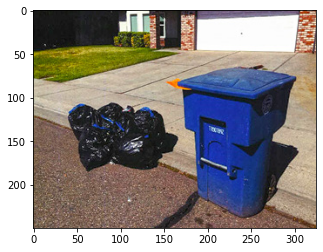

In [3]:
img = cv2.imread('data\\validation\\0063.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [4]:
classifier =  PixelClassifier()
height,width,depth = img.shape
img_reshape = img.reshape((height*width,3))

y = classifier.classify(img_reshape)

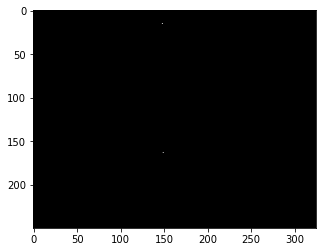

In [5]:
y = y.reshape((height,width))
# y = np.where(y == 1, 0, y)
# y = np.where(y == 2, 0, y)
# print('this is y',y[0])
plt.imshow(y, cmap='gray')
plt.show()

In [6]:
neg_mask = cv2.bitwise_not(y)

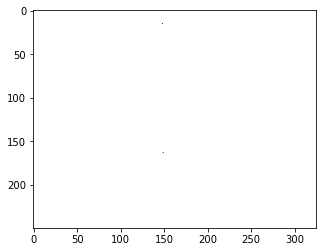

In [7]:
plt.imshow(neg_mask, cmap='gray')